In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Define the list of international indices and equities
indices = ['^XAX', '^FCHI', '^RUT', '^DJI', '^KS11']
equities = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'RY']

In [3]:
# Load data for indices and equities
index_data = yf.download(indices, start='2010-01-01', end='2023-05-01')['Adj Close']
equity_data = yf.download(equities, start='2010-01-01', end='2023-05-01')['Adj Close']
print(index_data)
print(equity_data)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
                    ^DJI        ^FCHI        ^KS11         ^RUT         ^XAX
Date                                                                        
2010-01-04  10583.959961  4013.969971  1696.140015   640.099976  1853.660034
2010-01-05  10572.019531  4012.909912  1690.619995   638.489990  1859.920044
2010-01-06  10573.679688  4017.669922  1705.319946   637.950012  1866.900024
2010-01-07  10606.860352  4024.800049  1683.449951   641.969971  1868.020020
2010-01-08  10618.190430  4045.139893  1695.260010   644.559998  1872.500000
...                  ...          ...          ...          ...          ...
2023-04-24  33875.398438  7573.859863  2523.500000  1788.869995  4283.879883
2023-04-25  33530.828125  7531.609863  2489.020020  1745.949951  4191.330078
2023-04-26  33301.871094  7466.660156  2484.830078  1730.410034  4174.149902
2023-04-27  338

In [4]:
# Calculate daily returns
index_returns = index_data.pct_change()
equity_returns = equity_data.pct_change()
print(index_returns)
print(equity_returns)

                ^DJI     ^FCHI     ^KS11      ^RUT      ^XAX
Date                                                        
2010-01-04       NaN       NaN       NaN       NaN       NaN
2010-01-05 -0.001128 -0.000264 -0.003254 -0.002515  0.003377
2010-01-06  0.000157  0.001186  0.008695 -0.000846  0.003753
2010-01-07  0.003138  0.001775 -0.012825  0.006301  0.000600
2010-01-08  0.001068  0.005054  0.007015  0.004034  0.002398
...              ...       ...       ...       ...       ...
2023-04-24  0.001965 -0.000414 -0.008214 -0.001474  0.006951
2023-04-25 -0.010172 -0.005578 -0.013664 -0.023993 -0.021604
2023-04-26 -0.006828 -0.008624 -0.001683 -0.008901 -0.004099
2023-04-27  0.015744  0.002301  0.004419  0.012026  0.004037
2023-04-28  0.008041  0.001024  0.002292  0.010147  0.002028

[3459 rows x 5 columns]
                AAPL      AMZN     GOOGL      MSFT        RY
Date                                                        
2010-01-04       NaN       NaN       NaN       NaN       NaN

In [5]:
# Calculate cumulative returns
index_cum_returns = index_returns.add(1).cumprod()
equity_cum_returns = equity_returns.add(1).cumprod()

In [6]:
# Calculate volatility (standard deviation of daily returns)
index_volatility = index_returns.std() * (252 ** 0.5)
equity_volatility = equity_returns.std() * (252 ** 0.5)

In [7]:
# Calculate maximum drawdowns
index_drawdowns = (index_cum_returns.div(index_cum_returns.cummax()) - 1).min()
equity_drawdowns = (equity_cum_returns.div(equity_cum_returns.cummax()) - 1).min()

In [8]:
# Calculate Sharpe ratio
risk_free_rate = 0.00
index_excess_returns = index_returns.sub(risk_free_rate)
index_sharpe_ratio = index_excess_returns.mean() / index_volatility

equity_excess_returns = equity_returns.sub(risk_free_rate)
equity_sharpe_ratio = equity_excess_returns.mean() / equity_volatility

In [9]:
# Calculate Sortino ratio
index_downside_returns = index_returns.where(index_returns < 0, 0)
index_downside_volatility = index_downside_returns.std() * (252 ** 0.5)
index_sortino_ratio = index_excess_returns.mean() / index_downside_volatility

equity_downside_returns = equity_returns.where(equity_returns < 0, 0)
equity_downside_volatility = equity_downside_returns.std() * (252 ** 0.5)
equity_sortino_ratio = equity_excess_returns.mean() / equity_downside_volatility

Index Metrics:
      Volatility Max Drawdown Sharpe Ratio Sortino Ratio
^DJI    0.169167    -0.370862     0.002337      0.003580
^FCHI   0.202544    -0.385585     0.001294      0.002038
^KS11   0.162076    -0.438979     0.001015      0.001589
^RUT    0.226480    -0.430613     0.001750      0.002742
^XAX    0.192963    -0.535116     0.001612      0.002483


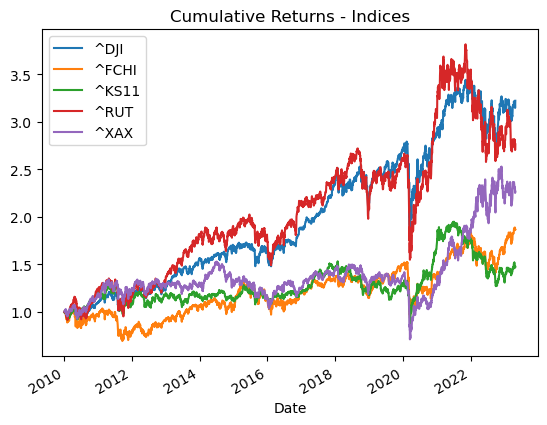


Equity Metrics:
      Volatility Max Drawdown Sharpe Ratio Sortino Ratio
AAPL    0.286001    -0.437972     0.003971      0.006634
AMZN    0.331799    -0.561453     0.003136      0.005318
GOOGL   0.272976    -0.443201     0.002642      0.004422
MSFT    0.261395    -0.371485     0.003447      0.005786
RY      0.209038    -0.399540     0.002004      0.003202


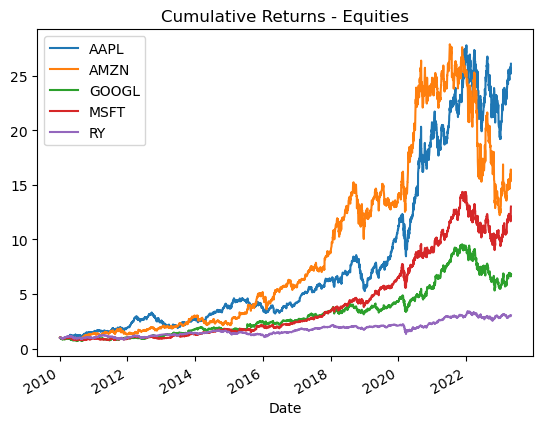

In [10]:
# Display the calculated metrics
index_metrics = pd.DataFrame({"Volatility": index_volatility, 
                              "Max Drawdown" : index_drawdowns,
                        'Sharpe Ratio': index_sharpe_ratio,
                        'Sortino Ratio': index_sortino_ratio})
index_metrics.columns = pd.MultiIndex.from_product([index_metrics.columns])
equity_metrics = pd.DataFrame({"Volatility": equity_volatility, 
                              "Max Drawdown" : equity_drawdowns,
                        'Sharpe Ratio': equity_sharpe_ratio,
                        'Sortino Ratio': equity_sortino_ratio})
equity_metrics.columns = pd.MultiIndex.from_product([ equity_metrics.columns])
print("Index Metrics:")
print(index_metrics)
index_cum_returns.plot(title='Cumulative Returns - Indices')
plt.show()

print()
print("Equity Metrics:")
print(equity_metrics)
equity_cum_returns.plot(title='Cumulative Returns - Equities')
plt.show()
